# Implementation of face recognition using neural net 

In [5]:
%matplotlib inline

In [351]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


#### Listing the path of all the images

In [8]:
DatasetPath = []
for i in os.listdir("orl_faces_small"):
    DatasetPath.append(os.path.join("orl_faces_small", i))

#### Reading each image and assigning respective labels

In [9]:
imageData = []
imageLabels = []

In [10]:
for i in DatasetPath:
    imgRead = io.imread(i,as_grey=True)
    imageData.append(imgRead)
    
    labelRead = int(os.path.split(i)[1].split("_")[0].replace("person", "")) - 1
    imageLabels.append(labelRead)

#### Preprocessing: PCA on image vector

In [11]:
imageDataFin = imageData

In [12]:
c = np.array(imageData)

In [13]:
c.shape

(390, 112, 92)

#### Splitting Dataset into train and test

In [341]:
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin),np.array(imageLabels), train_size=0.7, random_state = 20)

In [342]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [343]:
X_train.shape

(273, 112, 92)

In [344]:
X_test.shape

(117, 112, 92)

In [345]:
nb_classes = 40
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [346]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [349]:
X_train = X_train.reshape(X_train.shape[0], 112*92)
X_test = X_test.reshape(X_test.shape[0], 112*92)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Preprocessing -PCA

(273, 100)
(117, 100)


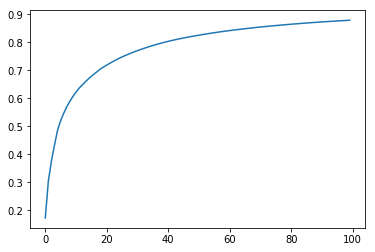

In [427]:
computed_pca = PCA(n_components=100, whiten=True).fit(X_train)
XTr_pca = computed_pca.transform(X_train)
XTs_pca = computed_pca.transform(X_test)
print(XTr_pca.shape)
print(XTs_pca.shape)
plt.plot(range(100),np.cumsum(computed_pca.explained_variance_ratio_))

In [398]:
print("Original Training matrix shape", X_train.shape)
print("Original Testing matrix shape", X_test.shape)

('Original Training matrix shape', (273, 10304))
('Original Testing matrix shape', (117, 10304))


In [399]:
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(XTr_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.75879067
Validation score: 0.000000
Iteration 2, loss = 3.45740943
Validation score: 0.071429
Iteration 3, loss = 3.16504449
Validation score: 0.142857
Iteration 4, loss = 2.88165146
Validation score: 0.178571
Iteration 5, loss = 2.60772726
Validation score: 0.214286
Iteration 6, loss = 2.34360817
Validation score: 0.321429
Iteration 7, loss = 2.09020243
Validation score: 0.392857
Iteration 8, loss = 1.84865999
Validation score: 0.428571
Iteration 9, loss = 1.62048402
Validation score: 0.428571
Iteration 10, loss = 1.40724373
Validation score: 0.500000
Iteration 11, loss = 1.21042071
Validation score: 0.500000
Iteration 12, loss = 1.03110925
Validation score: 0.535714
Iteration 13, loss = 0.87015981
Validation score: 0.571429
Iteration 14, loss = 0.72783359
Validation score: 0.571429
Iteration 15, loss = 0.60389314
Validation score: 0.571429
Iteration 16, loss = 0.49759007
Validation score: 0.678571
Iteration 17, loss = 0

In [400]:
y_pred = clf.predict(XTs_pca)
#print(y_pred,y_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         3
          9       1.00      0.83      0.91         6
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         4
         13       0.00      0.00      0.00         1
         14       1.00      1.00      1.00         1
         15       0.67      1.00      0.80         2
         16       1.00      1.00      1.00         2
         17       0.50      1.00      0.67   

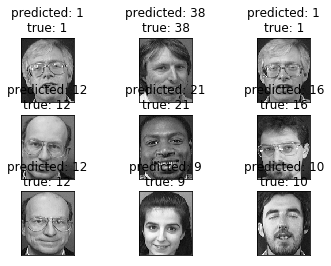

In [417]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=3):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)


#### Defining the model

In [402]:
model = Sequential()
model.add(Dense(1024,input_shape=(XTr_pca.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# model.add(Dense(75))
# model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [403]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              103424    
_________________________________________________________________
activation_60 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 40)                41000     
_________________________________________________________________
activation_61 (Activation)   (None, 40)                0         
Total params: 144,424
Trainable params: 144,424
Non-trainable params: 0
_________________________________________________________________


In [404]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#### Training

In [405]:
model.fit(XTr_pca, Y_train, batch_size=256, epochs=50, verbose=1, validation_data=(XTs_pca, Y_test))

Train on 273 samples, validate on 117 samples
Epoch 1/50
273/273 [==============================] - 1s 2ms/step - loss: 3.8231 - acc: 0.0147 - val_loss: 3.5539 - val_acc: 0.0598
Epoch 2/50
273/273 [==============================] - 0s 69us/step - loss: 3.3915 - acc: 0.1282 - val_loss: 3.3796 - val_acc: 0.1709
Epoch 3/50
273/273 [==============================] - 0s 78us/step - loss: 3.1114 - acc: 0.3516 - val_loss: 3.2207 - val_acc: 0.3333
Epoch 4/50
273/273 [==============================] - 0s 76us/step - loss: 2.8195 - acc: 0.5348 - val_loss: 3.0690 - val_acc: 0.4274
Epoch 5/50
273/273 [==============================] - 0s 67us/step - loss: 2.5437 - acc: 0.6593 - val_loss: 2.9249 - val_acc: 0.5299
Epoch 6/50
273/273 [==============================] - 0s 72us/step - loss: 2.3093 - acc: 0.7656 - val_loss: 2.7827 - val_acc: 0.6068
Epoch 7/50
273/273 [==============================] - 0s 68us/step - loss: 2.1170 - acc: 0.8095 - val_loss: 2.6362 - val_acc: 0.6325
Epoch 8/50
273/273 [====

#### Evaluating the performance

In [406]:
loss, accuracy = model.evaluate(XTs_pca,Y_test, verbose=0)

In [407]:
loss

0.54878911146750819

In [408]:
accuracy

0.96581196581196582

In [409]:
predicted_classes = model.predict_classes(XTs_pca)

In [410]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [411]:
correct_classified_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  64,  65,  66,  67,
        68,  69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116])

In [412]:
incorrect_classified_indices

array([33, 46, 63, 71])

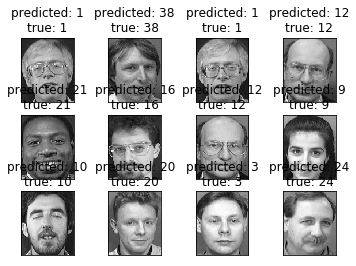

In [413]:
prediction_titles = list(titles(predicted_classes, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)

